# Contexte

Vous êtes consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

refaire le clusterinfg avec la date dernière achat

#### Les Données

Pour cette mission, Olist vous fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

#### Ressource limitée

Pour des raisons de confidentialité, nous ne pouvons pas vous fournir beaucoup de données à ce stade. Ensuite, en raison de ressources limitées, nous avons dû vous fournir l’ensemble des données, alors que seule une partie va vous intéresser. Nos dashboards internes nous indiquent en effet que seuls 3 % des clients du fichier de données partagé avec vous ont réalisé plusieurs commandes.

Nous sommes confiants sur le fait que les données à disposition suffiront pour réaliser un premier clustering. Cela a déjà été fait par d’autres prestataires par le passé, avec encore moins de données.

#### Exploitation des données par les équipes

La segmentation proposée doit être exploitable et facile d’utilisation par notre équipe Marketing. Elle doit au minimum pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction. Nous attendons bien sûr une segmentation sur l’ensemble des clients.

#### Recommandation sur la segmentation

Dans un deuxième temps, une fois le modèle de segmentation choisi, nous souhaiterions  que vous nous fassiez une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance.

Pour information, le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

Cas métier :
- les groupes distincts
- expliquer et comprendre la nature de cette diffférence

#### Les compétences évaluées

- Adapter les hyperparamètres d'un algorithme non supervisé afin de l'améliorer
- Évaluer les performances d’un modèle d'apprentissage non supervisé
- Transformer les variables pertinentes d'un modèle d'apprentissage non supervisé
- Mettre en place le modèle d'apprentissage non supervisé adapté au problème métier

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

### 1 Chargement des données

In [7]:
data_customers = pd.read_csv('Source/olist_customers_dataset.csv',sep=',')
data_geolocation = pd.read_csv('Source/olist_geolocation_dataset.csv',sep=',')
data_order_items = pd.read_csv('Source/olist_order_items_dataset.csv',sep=',')
data_order_payments = pd.read_csv('Source/olist_order_payments_dataset.csv',sep=',')
data_order_reviews = pd.read_csv('Source/olist_order_reviews_dataset.csv',sep=',')
data_order_dataset = pd.read_csv('Source/olist_orders_dataset.csv',sep=',')
data_products_dataset = pd.read_csv('Source/olist_products_dataset.csv',sep=',')
data_sellers_dataset = pd.read_csv('Source/olist_sellers_dataset.csv',sep=',')
data_product_category_name = pd.read_csv('Source/product_category_name_translation.csv',sep=',')

In [8]:
data_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [9]:
data_customers.customer_id.unique().shape
# 99441 clients

(99441,)

In [10]:
data_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [11]:
data_geolocation.isna().mean()

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

In [12]:
data_order_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [13]:
data_order_dataset.isna().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64

In [14]:
data_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [15]:
data_order_items.isna().mean()

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [16]:
data_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [17]:
data_order_payments.isna().mean()

order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

In [18]:
data_order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [19]:
data_order_reviews.isna().mean()

review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

In [20]:
data_products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [21]:
data_products_dataset.isna().mean()

product_id                    0.000000
product_category_name         0.018512
product_name_lenght           0.018512
product_description_lenght    0.018512
product_photos_qty            0.018512
product_weight_g              0.000061
product_length_cm             0.000061
product_height_cm             0.000061
product_width_cm              0.000061
dtype: float64

In [22]:
data_sellers_dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [23]:
data_sellers_dataset.isna().mean()

seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

In [24]:
data_product_category_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [25]:
data_product_category_name.isna().mean()

product_category_name            0.0
product_category_name_english    0.0
dtype: float64

Piste qui caractérise le client

- le montant dépensé par le client
- combien de fois cette personne a fait un achat (fréquence)
- la date du dernier achat
- la taille de son pannier 
- le score de satifaction du client 
- le delta entre la date dachat et la livraison du produit
- le retard de livraison (impact sur la fidélisation des clients)
- interdit de créer des features en plus !
- objectif => avoir une compilation des données correcte

## 2 Jointure des données


#### 2.1 Merge dataset product - dataset order items

In [26]:
data_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [27]:
merge_data = data_products_dataset.merge(data_order_items[['product_id',
                                                          'order_id',
                                                          'order_item_id',
                                                          'seller_id',
                                                          'shipping_limit_date',
                                                          'price',
                                                          'freight_value']],how='left',on='product_id')
merge_data

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


In [28]:
merge_data.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_id', 'order_item_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value'],
      dtype='object')

In [29]:
merge_data = merge_data[['product_id',
                       'product_category_name',
                       'order_id',
                       'order_item_id',
                       'seller_id',
                       'shipping_limit_date',
                       'price',
                       'freight_value']]
merge_data

,product_id,product_category_name,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


In [30]:
merge_data.isna().mean()

product_id               0.00000
product_category_name    0.01423
order_id                 0.00000
order_item_id            0.00000
seller_id                0.00000
shipping_limit_date      0.00000
price                    0.00000
freight_value            0.00000
dtype: float64

#### 2.2 Merge dataset filt_data - dataset product category name

In [31]:
merge_data = merge_data.merge(data_product_category_name,how='left')

In [32]:
merge_data.drop(columns='product_category_name',inplace=True)

In [33]:
data_order_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [34]:
merge_data.columns

Index(['product_id', 'order_id', 'order_item_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name_english'],
      dtype='object')

#### 2.3 Merge dataset filt_data - dataset order reviews

In [35]:
merge_data = merge_data.merge(data_order_reviews[['review_score','order_id']],how='left')
merge_data

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,perfumery,5.0
1,3aa071139cb16b67ca9e5dea641aaa2f,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,art,5.0
2,96bd76ec8810374ed1b65e291975717f,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,sports_leisure,5.0
3,cef67bcfe19066a932b7673e239eb23d,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,baby,1.0
4,9dc1a7de274444849c219cff195d0b71,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,housewares,5.0
...,...,...,...,...,...,...,...,...,...
113309,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,computers_accessories,4.0
113310,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0
113311,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0
113312,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0


#### 2.4 Merge dataset filt_data - dataset order payment

In [36]:
merge_data = merge_data.merge(data_order_payments[['order_id','payment_value']],how='left')
merge_data

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,perfumery,5.0,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,art,5.0,265.99
2,96bd76ec8810374ed1b65e291975717f,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,sports_leisure,5.0,87.62
3,cef67bcfe19066a932b7673e239eb23d,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,baby,1.0,121.84
4,9dc1a7de274444849c219cff195d0b71,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,housewares,5.0,46.19
...,...,...,...,...,...,...,...,...,...,...
118305,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,computers_accessories,4.0,92.02
118306,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54
118307,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54
118308,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54


In [37]:
merge_data.loc[merge_data.order_id == '6e4465d771f02e4fe335225de3c6c043']

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value
118306,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.9,23.28,computers_accessories,5.0,159.54
118307,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.9,23.28,computers_accessories,5.0,159.54
118308,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.9,23.28,computers_accessories,5.0,159.54


In [38]:
merge_data.loc[merge_data.order_id == '59e88b7d3675e89aceaf86f372d3bc9a']

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value
118304,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,1,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.9,16.11,computers_accessories,4.0,92.02
118305,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.9,16.11,computers_accessories,4.0,92.02


#### 2.5 Merge dataset filt_data - dataset order dataset

In [39]:
merge_data = merge_data.merge(data_order_dataset,how='left')

In [40]:
data_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [41]:
merge_data.columns

Index(['product_id', 'order_id', 'order_item_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name_english', 'review_score', 'payment_value',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

#### 2.6 Merge dataset filt_data - dataset data customers

In [42]:
merge_data = merge_data.merge(data_customers[['customer_id','customer_unique_id','customer_city']])
merge_data

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,perfumery,5.0,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu
1,3aa071139cb16b67ca9e5dea641aaa2f,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,art,5.0,265.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,4b86049cb99e4aa774031daa9cd18f18,rio de janeiro
2,96bd76ec8810374ed1b65e291975717f,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,sports_leisure,5.0,87.62,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,f63805d9c7edb84d92413af34b86a39c,sao paulo
3,cef67bcfe19066a932b7673e239eb23d,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,baby,1.0,121.84,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,619e926d09b26efbd5180368b1ddc874,sao paulo
4,9dc1a7de274444849c219cff195d0b71,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,housewares,5.0,46.19,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,ad353b4fb0e294adc4eda48af73e68a6,sao paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,computers_accessories,4.0,92.02,e750210dde7e68dbd5194c0809e97f7e,delivered,2018-01-03 15:05:53,2018-01-04 05:14:57,2018-01-04 15:57:18,2018-01-15 20:39:35,2018-02-02 00:00:00,4d1bbadcfd9bdc738e54599627870319,campo florido
118306,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,2cc893f1618b7317170ba2456cf76117,paramirim
118307,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,2cc893f1618b7317170ba2456cf76117,paramirim
118308,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,2cc893f1618b7317170ba2456cf76117,paramirim


In [43]:
len(merge_data.customer_unique_id.unique())

95420

In [44]:
len(merge_data.customer_id.unique())

98666

In [45]:
len(merge_data.order_id.unique())

98666

In [46]:
merge_data.isna().mean()

product_id                       0.000000
order_id                         0.000000
order_item_id                    0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
product_category_name_english    0.014656
review_score                     0.008266
payment_value                    0.000025
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000127
order_delivered_carrier_date     0.010599
order_delivered_customer_date    0.021875
order_estimated_delivery_date    0.000000
customer_unique_id               0.000000
customer_city                    0.000000
dtype: float64

#### 3. Imputation des données
- 3.1 recherche de valeurs aberrantes ou atypique avec la méthode isalatio forest
- 3.2 recherche de doublons
- 3.3 Création d'un dataframe avec les variables pour la modélisation

In [47]:
merge_data = merge_data.loc[merge_data.order_status == 'delivered'].copy()
merge_data

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,perfumery,5.0,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu
1,3aa071139cb16b67ca9e5dea641aaa2f,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,art,5.0,265.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,4b86049cb99e4aa774031daa9cd18f18,rio de janeiro
2,96bd76ec8810374ed1b65e291975717f,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,sports_leisure,5.0,87.62,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,f63805d9c7edb84d92413af34b86a39c,sao paulo
3,cef67bcfe19066a932b7673e239eb23d,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,baby,1.0,121.84,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,619e926d09b26efbd5180368b1ddc874,sao paulo
4,9dc1a7de274444849c219cff195d0b71,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,housewares,5.0,46.19,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,ad353b4fb0e294adc4eda48af73e68a6,sao paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,computers_accessories,4.0,92.02,e750210dde7e68dbd5194c0809e97f7e,delivered,2018-01-03 15:05:53,2018-01-04 05:14:57,2018-01-04 15:57:18,2018-01-15 20:39:35,2018-02-02 00:00:00,4d1bbadcfd9bdc738e54599627870319,campo florido
118306,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,2cc893f1618b7317170ba2456cf76117,paramirim
118307,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,2cc893f1618b7317170ba2456cf76117,paramirim
118308,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,2cc893f1618b7317170ba2456cf76117,paramirim


In [48]:
# supprimer les valeurs manquantes

filt_data = merge_data.dropna()
filt_data.isna().mean()

product_id                       0.0
order_id                         0.0
order_item_id                    0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
product_category_name_english    0.0
review_score                     0.0
payment_value                    0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
customer_unique_id               0.0
customer_city                    0.0
dtype: float64

#### 3.1 Recherche de outliers

In [49]:
# recherche de outliers

from sklearn.ensemble import IsolationForest

X = filt_data.select_dtypes(include = np.number)

clf = IsolationForest(random_state=0, contamination=0.2).fit(X)

contamination = clf.predict(X)

filt_data['outliers'] = contamination



C:\Users\Dragomir\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\Dragomir\AppData\Local\Temp\ipykernel_13008\1543275527.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data['outliers'] = contamination


In [50]:
filt_data.outliers.value_counts()

 1    90553
-1    22634
Name: outliers, dtype: int64

In [51]:
filt_data.loc[filt_data.outliers == -1]

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,outliers
6,732bd381ad09e530fe0a5f457d81becb,9632facd8bd95315d63a23bf616d85b0,1,8b8cfc8305aa441e4239358c9f6f2485,2018-01-18 12:39:24,958.00,27.76,cool_stuff,2.0,985.76,7e395b4bf53aea8c56b1213f1b801411,delivered,2018-01-14 12:31:15,2018-01-14 12:39:24,2018-01-15 21:56:33,2018-01-19 22:39:01,2018-02-07 00:00:00,f7495a8d48d05ca657eb075b905a1b8b,guarulhos,-1
7,732bd381ad09e530fe0a5f457d81becb,c6343db6c1801f9c3301166f02931116,1,8b8cfc8305aa441e4239358c9f6f2485,2017-12-11 11:30:51,968.00,44.30,cool_stuff,5.0,1012.30,30f840412466fa26e5c035e1ad1fdec3,delivered,2017-12-05 11:14:58,2017-12-05 12:01:44,2017-12-08 20:46:55,2017-12-18 18:59:14,2018-01-03 00:00:00,3256bccea9c8aa521d29257b56c54f88,rio de janeiro,-1
8,2548af3e6e77a690cf3eb6368e9ab61e,6ecf7023e8dd4ec8b08746c35b9fcb60,3,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,9.99,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,-1
9,2548af3e6e77a690cf3eb6368e9ab61e,6ecf7023e8dd4ec8b08746c35b9fcb60,4,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,9.99,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,-1
11,140a8324a66db81d299b24b30d93098e,6ecf7023e8dd4ec8b08746c35b9fcb60,2,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,39.90,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118276,a0b7d5a992ccda646f2d34e418fff5a0,73ab919f6023d8c8a68fb70d0b08a28b,1,95f83f51203c626648c875dd41874c7f,2018-08-08 15:24:03,69.90,106.95,furniture_decor,3.0,176.85,7911c4a4ae2d5749ce6f3e40fbdeb5e5,delivered,2018-08-02 15:07:15,2018-08-02 15:24:03,2018-08-07 14:32:00,2018-08-15 15:21:47,2018-08-28 00:00:00,20802dd4d187913c6d5b2b8f605bb817,sao luiz gonzaga,-1
118289,a0b7d5a992ccda646f2d34e418fff5a0,bc872fdadc90fb5e74184afcf627810a,1,95f83f51203c626648c875dd41874c7f,2018-06-01 07:54:01,69.90,28.80,furniture_decor,1.0,98.70,376f23503d92d4b47a304738bb8f7870,delivered,2018-05-18 00:32:13,2018-05-22 07:54:01,2018-05-23 14:11:00,2018-06-09 13:22:15,2018-06-20 00:00:00,83ad84ada96d58cded17e914b6ebf2fb,sao paulo,-1
118291,a0b7d5a992ccda646f2d34e418fff5a0,d19868a76a0e39afe462fa942122200c,1,95f83f51203c626648c875dd41874c7f,2018-01-05 19:09:24,69.90,80.66,furniture_decor,2.0,150.56,0c0202f6f6b9ce5a9aa8f9fa0a7580c4,delivered,2017-12-29 19:03:07,2017-12-29 19:09:24,2018-01-02 21:41:55,2018-01-24 01:16:45,2018-01-31 00:00:00,6f028dec6f26ff16182703be1453bfd4,aracaju,-1
118292,a0b7d5a992ccda646f2d34e418fff5a0,dce45bc65432c8a78cbd021460178145,1,95f83f51203c626648c875dd41874c7f,2018-02-22 06:51:01,69.90,26.11,furniture_decor,1.0,96.01,166cb796fb9a2d5c5ce8bede811f3839,delivered,2018-02-15 10:19:55,2018-02-16 07:51:01,2018-02-19 19:42:14,2018-02-28 14:49:22,2018-03-13 00:00:00,d72a0b0a95a97197efb0d0d20978f6cc,sao jose do rio preto,-1


In [54]:
# affcte uniquement les variables qui ne sont pas considérer comme des outliers 

filt_data2  = filt_data[filt_data.outliers == 1]
filt_data2

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,outliers
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,perfumery,5.0,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu,1
1,3aa071139cb16b67ca9e5dea641aaa2f,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,art,5.0,265.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,4b86049cb99e4aa774031daa9cd18f18,rio de janeiro,1
2,96bd76ec8810374ed1b65e291975717f,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,sports_leisure,5.0,87.62,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,f63805d9c7edb84d92413af34b86a39c,sao paulo,1
3,cef67bcfe19066a932b7673e239eb23d,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,baby,1.0,121.84,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,619e926d09b26efbd5180368b1ddc874,sao paulo,1
4,9dc1a7de274444849c219cff195d0b71,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,housewares,5.0,46.19,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,ad353b4fb0e294adc4eda48af73e68a6,sao paulo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118304,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,1,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,computers_accessories,4.0,92.02,e750210dde7e68dbd5194c0809e97f7e,delivered,2018-01-03 15:05:53,2018-01-04 05:14:57,2018-01-04 15:57:18,2018-01-15 20:39:35,2018-02-02 00:00:00,4d1bbadcfd9bdc738e54599627870319,campo florido,1
118305,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,computers_accessories,4.0,92.02,e750210dde7e68dbd5194c0809e97f7e,delivered,2018-01-03 15:05:53,2018-01-04 05:14:57,2018-01-04 15:57:18,2018-01-15 20:39:35,2018-02-02 00:00:00,4d1bbadcfd9bdc738e54599627870319,campo florido,1
118306,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,2cc893f1618b7317170ba2456cf76117,paramirim,1
118307,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,2cc893f1618b7317170ba2456cf76117,paramirim,1


In [55]:
# recherche de doublon sur les commandes supérieurs à 1

nb_order = filt_data.loc[filt_data.order_item_id>1]
nb_order


,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,outliers
8,2548af3e6e77a690cf3eb6368e9ab61e,6ecf7023e8dd4ec8b08746c35b9fcb60,3,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,9.99,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,-1
9,2548af3e6e77a690cf3eb6368e9ab61e,6ecf7023e8dd4ec8b08746c35b9fcb60,4,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,9.99,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,-1
11,140a8324a66db81d299b24b30d93098e,6ecf7023e8dd4ec8b08746c35b9fcb60,2,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,39.90,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,-1
14,2548af3e6e77a690cf3eb6368e9ab61e,8ac5b235603eee2e21e36261b2df536c,2,95f83f51203c626648c875dd41874c7f,2017-12-01 11:35:41,9.99,21.96,furniture_decor,2.0,82.55,2ea5983ec2edde5dcba726ea64e9fadb,delivered,2017-11-27 11:26:14,2017-11-27 11:35:41,2017-11-30 16:41:39,2017-12-05 21:32:09,2017-12-20 00:00:00,1dedbe50138a3540d30fe355776d2d6a,sao paulo,-1
15,2548af3e6e77a690cf3eb6368e9ab61e,8ac5b235603eee2e21e36261b2df536c,2,95f83f51203c626648c875dd41874c7f,2017-12-01 11:35:41,9.99,21.96,furniture_decor,2.0,34.11,2ea5983ec2edde5dcba726ea64e9fadb,delivered,2017-11-27 11:26:14,2017-11-27 11:35:41,2017-11-30 16:41:39,2017-12-05 21:32:09,2017-12-20 00:00:00,1dedbe50138a3540d30fe355776d2d6a,sao paulo,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118261,c4e71b64511b959455e2107fe7859020,cba21bedbcfe88bcc7e6918e9555355c,2,aced59e9b31ef866a94f9e7f29d8d418,2017-12-06 15:53:25,25.00,7.78,housewares,5.0,65.56,24c7b4e5422cb09dd297eb1b3fc7565e,delivered,2017-11-30 15:43:15,2017-11-30 15:53:25,2017-12-05 19:46:37,2017-12-07 17:19:18,2017-12-18 00:00:00,688d86c21c588eed89f126f956aa0825,guarulhos,1
118303,83808703fc0706a22e264b9d75f04a2e,420937423f0cb3d3fe689330b5d385a9,2,4324dd16853115efb0fd9d0d131ba6f4,2017-10-26 02:49:13,39.71,16.11,computers_accessories,5.0,111.64,c17ef88b39d731163898d59a3a9b6e47,delivered,2017-10-19 09:26:47,2017-10-21 02:49:13,2017-10-23 15:28:20,2017-10-26 16:05:41,2017-11-10 00:00:00,1fd97aeef909db302af3962152746e9e,petropolis,1
118305,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,computers_accessories,4.0,92.02,e750210dde7e68dbd5194c0809e97f7e,delivered,2018-01-03 15:05:53,2018-01-04 05:14:57,2018-01-04 15:57:18,2018-01-15 20:39:35,2018-02-02 00:00:00,4d1bbadcfd9bdc738e54599627870319,campo florido,1
118307,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,2cc893f1618b7317170ba2456cf76117,paramirim,1


In [56]:
# Nombre de clients qui ont commandé plus d'une fois 

nb_order.groupby(by = 'customer_unique_id')['order_id'].agg('count')

customer_unique_id
00053a61a98854899e70ed204dd4bafe    1
000de6019bb59f34c099a907c151d855    1
000fbf0473c10fc1ab6f8d2d286ce20c    3
001147e649a7b1afd577e873841632dd    1
0015752e079902b12cd00b9b7596276b    1
                                   ..
ffe96201d466b0e0dc8139850be29d5d    1
fff22793223fe80c97a8fd02ac5c6295    2
fff5eb4918b2bf4b2da476788d42051c    5
fff7219c86179ca6441b8f37823ba3d3    1
fffcf5a5ff07b0908bd4e2dbc735a684    1
Name: order_id, Length: 9262, dtype: int64

#### 3.2 Recherche de doublon, Nan, 

In [59]:
filt_data.loc[filt_data.customer_unique_id.duplicated(keep=False)]

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,outliers
8,2548af3e6e77a690cf3eb6368e9ab61e,6ecf7023e8dd4ec8b08746c35b9fcb60,3,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,9.99,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,-1
9,2548af3e6e77a690cf3eb6368e9ab61e,6ecf7023e8dd4ec8b08746c35b9fcb60,4,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,9.99,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,-1
10,140a8324a66db81d299b24b30d93098e,6ecf7023e8dd4ec8b08746c35b9fcb60,1,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,39.90,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,1
11,140a8324a66db81d299b24b30d93098e,6ecf7023e8dd4ec8b08746c35b9fcb60,2,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,39.90,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,-1
12,2548af3e6e77a690cf3eb6368e9ab61e,8ac5b235603eee2e21e36261b2df536c,1,95f83f51203c626648c875dd41874c7f,2017-12-01 11:35:41,9.99,21.96,furniture_decor,2.0,82.55,2ea5983ec2edde5dcba726ea64e9fadb,delivered,2017-11-27 11:26:14,2017-11-27 11:35:41,2017-11-30 16:41:39,2017-12-05 21:32:09,2017-12-20 00:00:00,1dedbe50138a3540d30fe355776d2d6a,sao paulo,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118304,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,1,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,computers_accessories,4.0,92.02,e750210dde7e68dbd5194c0809e97f7e,delivered,2018-01-03 15:05:53,2018-01-04 05:14:57,2018-01-04 15:57:18,2018-01-15 20:39:35,2018-02-02 00:00:00,4d1bbadcfd9bdc738e54599627870319,campo florido,1
118305,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,computers_accessories,4.0,92.02,e750210dde7e68dbd5194c0809e97f7e,delivered,2018-01-03 15:05:53,2018-01-04 05:14:57,2018-01-04 15:57:18,2018-01-15 20:39:35,2018-02-02 00:00:00,4d1bbadcfd9bdc738e54599627870319,campo florido,1
118306,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,2cc893f1618b7317170ba2456cf76117,paramirim,1
118307,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,computers_accessories,5.0,159.54,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,2cc893f1618b7317170ba2456cf76117,paramirim,1


In [60]:
# faux positif

filt_data.loc[filt_data.customer_unique_id=='8fe54925e8ff1067c803ae7026fe384b']

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,outliers
8,2548af3e6e77a690cf3eb6368e9ab61e,6ecf7023e8dd4ec8b08746c35b9fcb60,3,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,9.99,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,-1
9,2548af3e6e77a690cf3eb6368e9ab61e,6ecf7023e8dd4ec8b08746c35b9fcb60,4,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,9.99,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,-1
10,140a8324a66db81d299b24b30d93098e,6ecf7023e8dd4ec8b08746c35b9fcb60,1,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,39.90,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,1
11,140a8324a66db81d299b24b30d93098e,6ecf7023e8dd4ec8b08746c35b9fcb60,2,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,39.90,16.02,furniture_decor,2.0,163.88,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00,8fe54925e8ff1067c803ae7026fe384b,ribeirao pires,-1


#### 3.3 recherche de valeurs aberrantes ou atypiques

In [62]:
filt_data.describe()

,order_item_id,price,freight_value,review_score,payment_value,outliers
count,113187.000000,113187.000000,113187.000000,113187.000000,113187.000000,113187.000000
mean,1.195067,119.864381,20.002989,4.082615,171.576489,0.600060
std,0.687539,181.163901,15.711971,1.345828,264.257415,0.799958
min,1.000000,0.850000,0.000000,1.000000,0.000000,-1.000000
25%,1.000000,39.900000,13.080000,4.000000,60.850000,1.000000
50%,1.000000,74.900000,16.320000,5.000000,107.960000,1.000000
75%,1.000000,132.980000,21.190000,5.000000,189.160000,1.000000
max,21.000000,6735.000000,409.680000,5.000000,13664.080000,1.000000


In [97]:
filt_data[filt_data.order_item_id> 20]['customer_unique_id'].values

array(['4546caea018ad8c692964e3382debd19'], dtype=object)

In [99]:
filt_data.loc[filt_data.customer_unique_id == '4546caea018ad8c692964e3382debd19']

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,outliers,payment_item,late_delivered,date_last_purchase
7538,79ce45dbc2ea29b22b5a261bbb7b7ee7,8272b63d03f5f79c56e9e4120aec44ef,21,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.8,6.57,health_beauty,1.0,196.11,...,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,4546caea018ad8c692964e3382debd19,sao paulo,-1,14.37,3,408
7539,270516a3f41dc035aa87d220228f844c,8272b63d03f5f79c56e9e4120aec44ef,1,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,1.0,196.11,...,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,4546caea018ad8c692964e3382debd19,sao paulo,-1,9.09,3,408
7540,270516a3f41dc035aa87d220228f844c,8272b63d03f5f79c56e9e4120aec44ef,12,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,1.0,196.11,...,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,4546caea018ad8c692964e3382debd19,sao paulo,-1,9.09,3,408
7541,270516a3f41dc035aa87d220228f844c,8272b63d03f5f79c56e9e4120aec44ef,13,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,1.0,196.11,...,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,4546caea018ad8c692964e3382debd19,sao paulo,-1,9.09,3,408
7542,270516a3f41dc035aa87d220228f844c,8272b63d03f5f79c56e9e4120aec44ef,14,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,1.0,196.11,...,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,4546caea018ad8c692964e3382debd19,sao paulo,-1,9.09,3,408
7543,270516a3f41dc035aa87d220228f844c,8272b63d03f5f79c56e9e4120aec44ef,15,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,1.0,196.11,...,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,4546caea018ad8c692964e3382debd19,sao paulo,-1,9.09,3,408
7544,270516a3f41dc035aa87d220228f844c,8272b63d03f5f79c56e9e4120aec44ef,16,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,1.0,196.11,...,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,4546caea018ad8c692964e3382debd19,sao paulo,-1,9.09,3,408
7545,270516a3f41dc035aa87d220228f844c,8272b63d03f5f79c56e9e4120aec44ef,17,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,1.0,196.11,...,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,4546caea018ad8c692964e3382debd19,sao paulo,-1,9.09,3,408
7546,270516a3f41dc035aa87d220228f844c,8272b63d03f5f79c56e9e4120aec44ef,18,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,1.0,196.11,...,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,4546caea018ad8c692964e3382debd19,sao paulo,-1,9.09,3,408
7547,270516a3f41dc035aa87d220228f844c,8272b63d03f5f79c56e9e4120aec44ef,19,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,1.0,196.11,...,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,4546caea018ad8c692964e3382debd19,sao paulo,-1,9.09,3,408


In [63]:
# valeur atypique

filt_data[filt_data.payment_value > 10000]

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,outliers
92547,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,1,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,-1
92548,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,2,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,-1
92549,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,3,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,-1
92550,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,-1
92551,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,5,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,-1
92552,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,6,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,-1
92553,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,7,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,-1
92554,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,8,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,-1


In [69]:
# la valeur dans la variable payment_value est aberrante car la somme de tous les articles ne corresponds pas

filt_data.loc[filt_data.customer_unique_id == '9a736b248f67d166d2fbb006bcb877c3']

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,review_score,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,outliers
43882,ebf9bc6cd600eadd681384e3116fda85,895ab968e7bb0d5659d16cd74cd1650c,1,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,bed_bath_table,5.0,16.70,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,1
43883,ebf9bc6cd600eadd681384e3116fda85,895ab968e7bb0d5659d16cd74cd1650c,1,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,bed_bath_table,5.0,2.61,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,1
43884,ebf9bc6cd600eadd681384e3116fda85,895ab968e7bb0d5659d16cd74cd1650c,1,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,bed_bath_table,5.0,16.70,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,1
43885,ebf9bc6cd600eadd681384e3116fda85,895ab968e7bb0d5659d16cd74cd1650c,1,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,bed_bath_table,5.0,16.70,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,1
43886,ebf9bc6cd600eadd681384e3116fda85,895ab968e7bb0d5659d16cd74cd1650c,1,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,bed_bath_table,5.0,0.24,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60791,4eb99b5f0d7e411f246a5c9c0ae27a5e,67d83bd36ec2c7fb557742fb58837659,1,53e4c6e0f4312d4d2107a8c9cddf45cd,2017-08-02 13:15:19,45.20,26.97,furniture_decor,5.0,8.00,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,1
60792,4eb99b5f0d7e411f246a5c9c0ae27a5e,67d83bd36ec2c7fb557742fb58837659,1,53e4c6e0f4312d4d2107a8c9cddf45cd,2017-08-02 13:15:19,45.20,26.97,furniture_decor,5.0,8.00,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,1
60793,4eb99b5f0d7e411f246a5c9c0ae27a5e,67d83bd36ec2c7fb557742fb58837659,1,53e4c6e0f4312d4d2107a8c9cddf45cd,2017-08-02 13:15:19,45.20,26.97,furniture_decor,5.0,8.00,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,1
60794,4eb99b5f0d7e411f246a5c9c0ae27a5e,67d83bd36ec2c7fb557742fb58837659,1,53e4c6e0f4312d4d2107a8c9cddf45cd,2017-08-02 13:15:19,45.20,26.97,furniture_decor,5.0,2.13,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,1


In [70]:
# calcul de la somme totale de la commande client 

filt_data['payment_item'] = filt_data.price + filt_data.freight_value

filt_data2['payment_item'] = filt_data2.price + filt_data2.freight_value

C:\Users\Dragomir\AppData\Local\Temp\ipykernel_13008\1441206050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data['payment_item'] = filt_data.price + filt_data.freight_value
C:\Users\Dragomir\AppData\Local\Temp\ipykernel_13008\1441206050.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data2['payment_item'] = filt_data2.price + filt_data2.freight_value


In [71]:
print('Ancienne commande : ',filt_data.order_purchase_timestamp.min(),' , Dernière commande : ', filt_data.order_purchase_timestamp.max())

Ancienne commande :  2016-10-03 09:44:50  , Dernière commande :  2018-08-29 15:00:37


### Variables retenues pour la segmentation client avec la méthode RFM

In [72]:
# calcul du temps de livraison sur les variables 

from datetime import datetime

delta = []
delta_last_order = []

for (delivered,deliver_estimated) in zip(filt_data.order_delivered_customer_date,filt_data.order_estimated_delivery_date):
    delt = datetime.strptime(delivered,"%Y-%m-%d %H:%M:%S") - datetime.strptime(deliver_estimated,"%Y-%m-%d %H:%M:%S")
    delta.append(delt.days)

# creation de la variable 

filt_data['late_delivered'] = delta


C:\Users\Dragomir\AppData\Local\Temp\ipykernel_13008\2770892334.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data['late_delivered'] = delta


In [73]:
last_order = filt_data.order_purchase_timestamp.max()

for last_purchase in filt_data.order_purchase_timestamp:
    last_purchase = datetime.strptime(last_order,"%Y-%m-%d %H:%M:%S") - datetime.strptime(last_purchase,"%Y-%m-%d %H:%M:%S")
    delta_last_order.append(last_purchase.days)
    
filt_data['date_last_purchase'] = delta_last_order

C:\Users\Dragomir\AppData\Local\Temp\ipykernel_13008\2078527970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data['date_last_purchase'] = delta_last_order


In [74]:
delta2 = []
delta_last_order2 = []


for (delivered,deliver_estimated) in zip(filt_data2.order_delivered_customer_date,filt_data2.order_estimated_delivery_date):
    delt = datetime.strptime(delivered,"%Y-%m-%d %H:%M:%S") - datetime.strptime(deliver_estimated,"%Y-%m-%d %H:%M:%S")
    delta2.append(delt.days)



filt_data2['late_delivered'] = delta2


C:\Users\Dragomir\AppData\Local\Temp\ipykernel_13008\1053006987.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data2['late_delivered'] = delta2


In [75]:
for last_purchase2 in filt_data2.order_purchase_timestamp:
    last_purchase2 = datetime.strptime(last_order,"%Y-%m-%d %H:%M:%S") - datetime.strptime(last_purchase2,"%Y-%m-%d %H:%M:%S")
    delta_last_order2.append(last_purchase2.days)

filt_data2['date_last_purchase'] = delta_last_order2


C:\Users\Dragomir\AppData\Local\Temp\ipykernel_13008\2246206907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data2['date_last_purchase'] = delta_last_order2


In [76]:
agg = {'order_id' : 'count',
       'review_score' : 'mean',
       'payment_item' : ['sum','mean'],
       'order_purchase_timestamp': 'last',
       'late_delivered' : 'last',
       'date_last_purchase' : 'last'
       }

In [77]:
df_agg = filt_data.groupby(by='customer_unique_id').agg(agg)
df_agg = df_agg.reset_index()
df_agg

customer_unique_id order_id review_score payment_item  \
                                           count         mean          sum   
0      0000366f3b9a7992bf8c76cfdf3221e2        1          5.0       141.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f        1          4.0        27.19   
2      0000f46a3911fa3c0805444483337064        1          3.0        86.22   
3      0000f6ccb0745a6a4b88665a16c9f078        1          4.0        43.62   
4      0004aac84e0df4da2b147fca70cf8255        1          5.0       196.89   
...                                 ...      ...          ...          ...   
91455  fffcf5a5ff07b0908bd4e2dbc735a684        2          5.0      2067.42   
91456  fffea47cd6d3cc0a88bd621562a9d061        1          4.0        84.58   
91457  ffff371b4d645b6ecea244b27531430a        1          5.0       112.46   
91458  ffff5962728ec6157033ef9805bacc48        1          5.0       133.69   
91459  ffffd2657e2aad2907e67c3e9daecbeb        1          5.0        71.56   

               order_purchase_timestamp late_delivered date_last_purchase  
          mean                     last           last               last  
0       141.90      2018-05-10 10:56:27             -5                111  
1        27.19      2018-05-07 11:11:27             -5                114  
2        86.22      2017-03-10 21:05:03             -2                536  
3        43.62      2017-10-12 20:29:41            -12                320  
4       196.89      2017-11-14 19:45:42             -8                287  
...        ...                      ...            ...                ...  
91455  1033.71      2017-06-08 21:00:36            -27                446  
91456    84.58      2017-12-10 20:07:56             -3                261  
91457   112.46      2017-02-07 15:49:16            -30                567  
91458   133.69      2018-05-02 15:17:41            -14                118  
91459    71.56      2017-05-02 20:18:45            -16                483  

[91460 rows x 8 columns]

In [78]:
df_agg2 = filt_data2.groupby(by='customer_unique_id').agg(agg)
df_agg2 = df_agg2.reset_index()
df_agg2

customer_unique_id order_id review_score payment_item  \
                                           count         mean          sum   
0      0000366f3b9a7992bf8c76cfdf3221e2        1          5.0       141.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f        1          4.0        27.19   
2      0000f46a3911fa3c0805444483337064        1          3.0        86.22   
3      0000f6ccb0745a6a4b88665a16c9f078        1          4.0        43.62   
4      0004aac84e0df4da2b147fca70cf8255        1          5.0       196.89   
...                                 ...      ...          ...          ...   
80217  fffb09418989a0dbff854a28163e47c6        1          5.0        73.16   
80218  fffea47cd6d3cc0a88bd621562a9d061        1          4.0        84.58   
80219  ffff371b4d645b6ecea244b27531430a        1          5.0       112.46   
80220  ffff5962728ec6157033ef9805bacc48        1          5.0       133.69   
80221  ffffd2657e2aad2907e67c3e9daecbeb        1          5.0        71.56   

              order_purchase_timestamp late_delivered date_last_purchase  
         mean                     last           last               last  
0      141.90      2018-05-10 10:56:27             -5                111  
1       27.19      2018-05-07 11:11:27             -5                114  
2       86.22      2017-03-10 21:05:03             -2                536  
3       43.62      2017-10-12 20:29:41            -12                320  
4      196.89      2017-11-14 19:45:42             -8                287  
...       ...                      ...            ...                ...  
80217   73.16      2017-12-17 19:14:35            -23                254  
80218   84.58      2017-12-10 20:07:56             -3                261  
80219  112.46      2017-02-07 15:49:16            -30                567  
80220  133.69      2018-05-02 15:17:41            -14                118  
80221   71.56      2017-05-02 20:18:45            -16                483  

[80222 rows x 8 columns]

In [116]:
df_agg2.columns = ['customer_unique_id',
                   'number_order_item',
                   'review_score',
                   'total_payment_order',
                   'average_payment_order',
                   'last_purchase_by_order',
                   'late_delivered_days',
                   'last_purchase_days']

In [117]:
df_agg.columns = ['customer_unique_id',
                  'number_order_item',
                  'review_score',
                  'total_payment_order',
                  'average_payment_order',
                  'last_purchase_by_order',
                  'late_delivered_days',
                  'last_purchase_days']

In [118]:
df_agg

,customer_unique_id,number_order_item,review_score,total_payment_order,average_payment_order,last_purchase_by_order,late_delivered_days,last_purchase_days
0,0000366f3b9a7992bf8c76cfdf3221e2,1,5.0,141.90,141.90,2018-05-10 10:56:27,-5,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,4.0,27.19,27.19,2018-05-07 11:11:27,-5,114
2,0000f46a3911fa3c0805444483337064,1,3.0,86.22,86.22,2017-03-10 21:05:03,-2,536
3,0000f6ccb0745a6a4b88665a16c9f078,1,4.0,43.62,43.62,2017-10-12 20:29:41,-12,320
4,0004aac84e0df4da2b147fca70cf8255,1,5.0,196.89,196.89,2017-11-14 19:45:42,-8,287
...,...,...,...,...,...,...,...,...
91455,fffcf5a5ff07b0908bd4e2dbc735a684,2,5.0,2067.42,1033.71,2017-06-08 21:00:36,-27,446
91456,fffea47cd6d3cc0a88bd621562a9d061,1,4.0,84.58,84.58,2017-12-10 20:07:56,-3,261
91457,ffff371b4d645b6ecea244b27531430a,1,5.0,112.46,112.46,2017-02-07 15:49:16,-30,567
91458,ffff5962728ec6157033ef9805bacc48,1,5.0,133.69,133.69,2018-05-02 15:17:41,-14,118


In [119]:
df_agg.describe()

,number_order_item,review_score,total_payment_order,average_payment_order,late_delivered_days,last_purchase_days
count,91460.000000,91460.000000,91460.00000,91460.000000,91460.00000,91460.000000
mean,1.237557,4.154736,173.09390,145.902846,-11.88665,237.375082
std,0.844402,1.279193,257.61755,195.936591,10.12444,152.769454
min,1.000000,1.000000,10.07000,9.341429,-147.00000,0.000000
25%,1.000000,4.000000,64.00000,57.780000,-17.00000,113.000000
50%,1.000000,5.000000,110.13000,96.320000,-12.00000,218.000000
75%,1.000000,5.000000,188.50000,162.830000,-7.00000,347.000000
max,75.000000,5.000000,13664.08000,6929.310000,188.00000,694.000000


In [120]:
df_agg2.describe()

,number_order_item,review_score,total_payment_order,average_payment_order,late_delivered_days,last_purchase_days
count,80222.000000,80222.000000,80222.000000,80222.000000,80222.000000,80222.000000
mean,1.128780,4.298658,115.350537,104.421378,-12.116352,238.825933
std,0.527578,1.140118,87.090960,66.871755,9.571503,153.107393
min,1.000000,1.000000,6.080000,6.080000,-147.000000,0.000000
25%,1.000000,4.000000,58.170000,54.620000,-17.000000,114.000000
50%,1.000000,5.000000,94.520000,86.501667,-13.000000,221.000000
75%,1.000000,5.000000,149.100000,137.670000,-7.000000,349.000000
max,33.000000,5.000000,3604.770000,436.690000,188.000000,694.000000


## Exploration des données 
- 4.1 visualisation des données retenue pour la segmentation des clients
- 4.2 Analyse multidimensionnelle 
- 4.3 Segmentation des clients avec le Kmeans


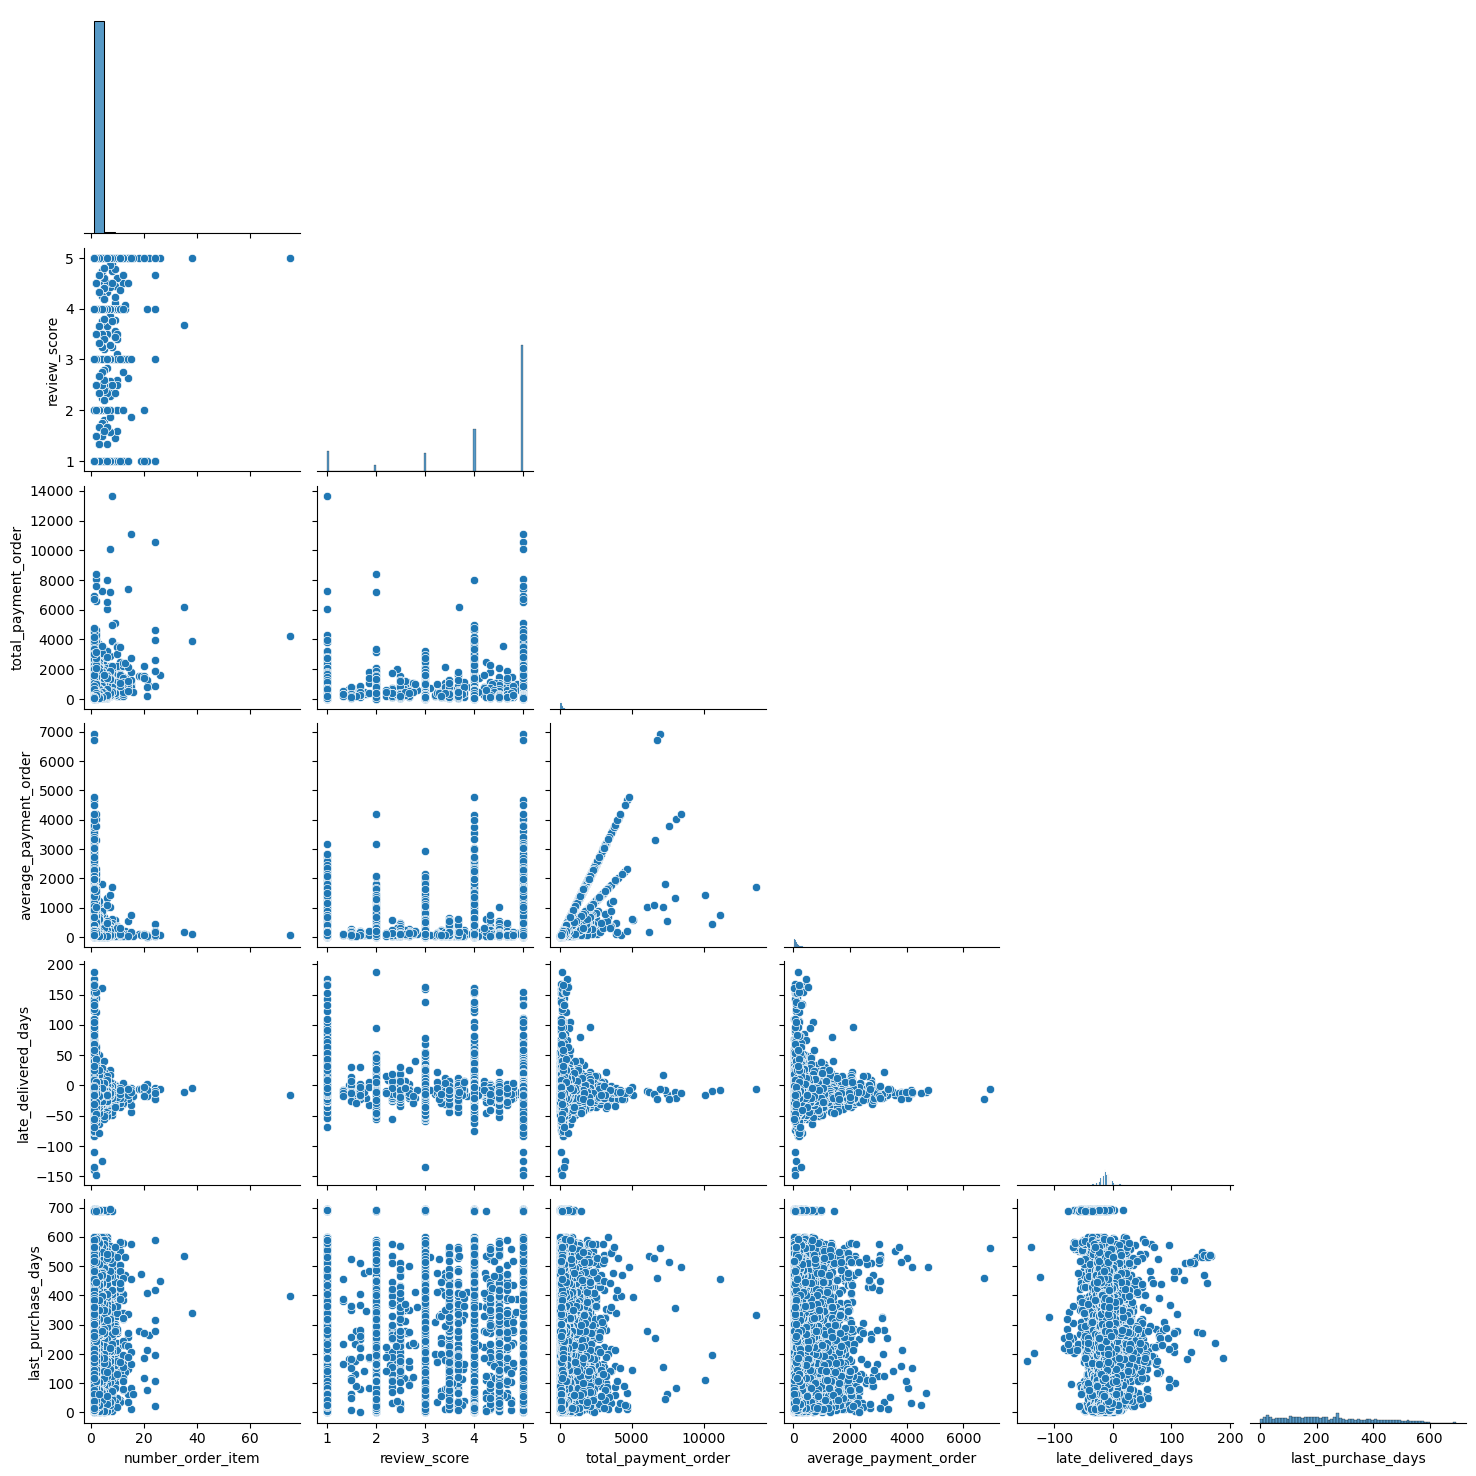

In [123]:
# distribution des données 

sns.pairplot(data = df_agg, corner=True )

In [125]:
df_agg.late_delivered_days.min(), df_agg.late_delivered_days.max()

(-147, 188)

<AxesSubplot:xlabel='last_purchase_days', ylabel='Count'>

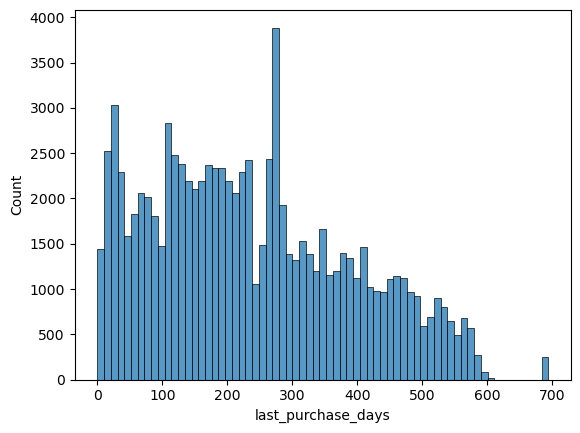

In [132]:
sns.histplot(data = df_agg, x = 'last_purchase_days')

<AxesSubplot:xlabel='late_delivered_days', ylabel='Count'>

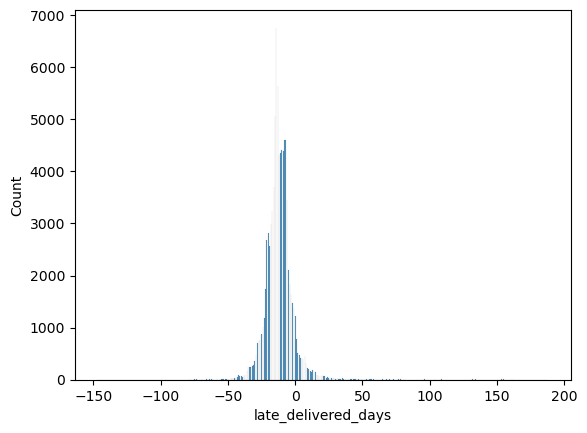

In [126]:
sns.histplot(data = df_agg, x = 'late_delivered_days')

<AxesSubplot:xlabel='total_payment_order', ylabel='Count'>

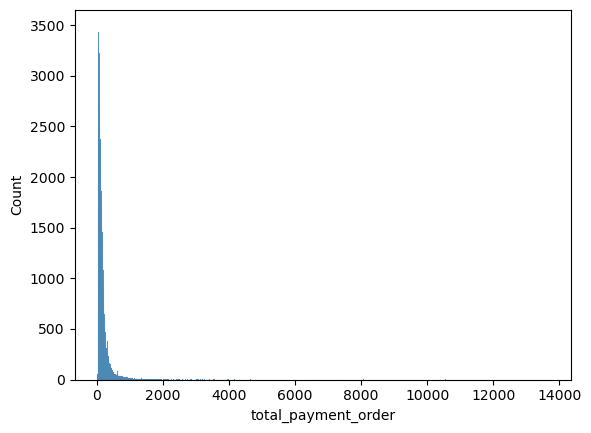

In [127]:
sns.histplot(data = df_agg, x = 'total_payment_order')

<AxesSubplot:xlabel='average_payment_order', ylabel='Count'>

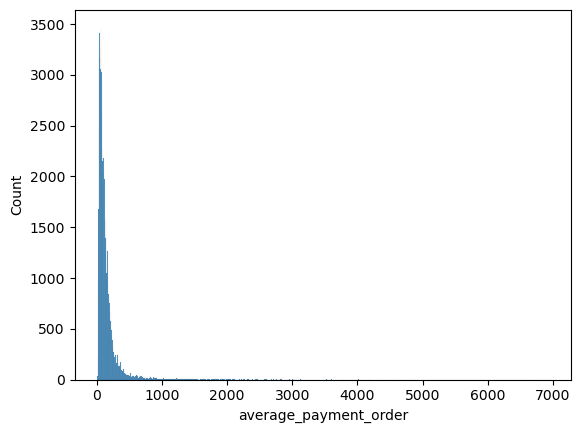

In [128]:
sns.histplot(data = df_agg, x = 'average_payment_order')

<AxesSubplot:xlabel='number_order_item', ylabel='Count'>

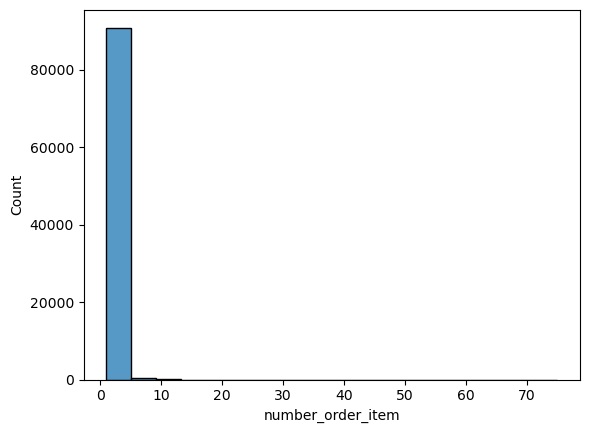

In [129]:
sns.histplot(data = df_agg, x = 'number_order_item')

<AxesSubplot:xlabel='average_payment_order', ylabel='Count'>

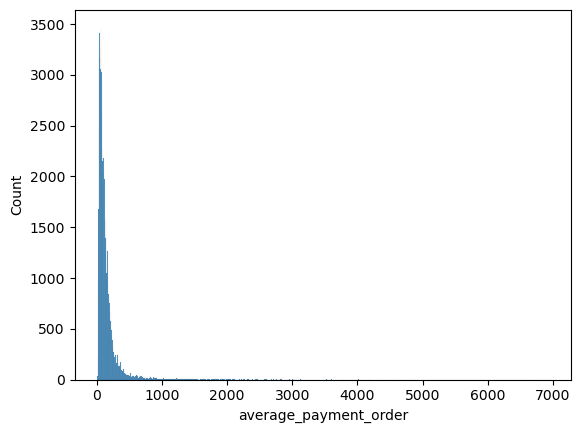

In [131]:
sns.histplot(data = df_agg, x = 'average_payment_order')

<AxesSubplot:>

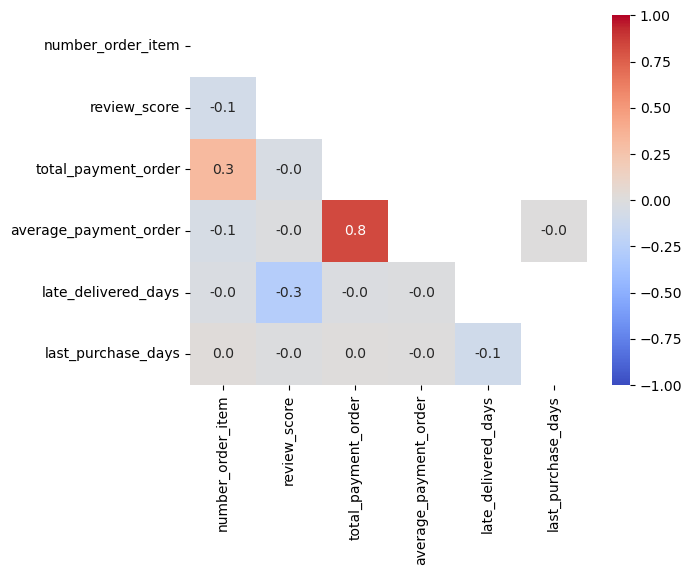

In [133]:
corr = df_agg.corr().round(2)
mask = np.triu(corr)

sns.heatmap(data =corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.1f',mask = mask)

In [134]:
# supression de la variable total_payment_order -> forte liaison avec la variable avearage_payment_order
df_agg.drop(columns='total_payment_order',inplace=True)

df_agg.to_csv('Clenead/exploratory_data_analisis.csv', index = False)

In [135]:
# supression de la variable total_payment_order -> forte liaison avec la variable avearage_payment_order
df_agg2.drop(columns='total_payment_order',inplace=True)

df_agg2.to_csv('Clenead/exploratory_data_analisis2.csv', index = False)